In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas
import numpy
import joblib

pandas.plotting.register_matplotlib_converters()

Using TensorFlow backend.


In [2]:
def graphicplotxy(x, y, x_label, y_label, title, filename):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y, alpha=0.70, )
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend(['MSE'])
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show
    plt.savefig(filename)

def to_supervised(data, n_in, n_out):
    n_vars = 1
    df = pandas.DataFrame(data)
    cols, names = list(), list()
    # urutan waktu input ke t- (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # urutan waktu output ke t+ (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]          
    # concat
    agg = pandas.concat(cols, axis=1)
    agg.columns = names
    # drop baris yang bernilai Nan
    agg.dropna(inplace=True)
    val = agg.values
    X, y = val[:, 0:n_in], val[:, n_in:]
    #reshape(sample, timestep, feature/input)
    X = X.reshape((X.shape[0], 1, n_in))
    return X, y

def eksperimen(nama, model, scaler, set_latih, set_uji, n_input = 1, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32):
    n_timestep = 1
    n_output = 1

    print("Hyperparameter {0}".format(nama))
    print("input = {0}\nneuron l1 = {1}\nneuron l2 = {2}\nepoch = {3}".format(n_input, n_neuron_l1, n_neuron_l2, n_epoch))
    
    # sliding windows
    X_train, y_train = to_supervised(set_latih, n_input, n_output)
    
    # Compile Model input_shape=(n_timesteps, n_features/input)
    model.add(LSTM(n_neuron_l1, input_shape=(n_timestep, n_input), return_sequences=True))
    model.add(LSTM(n_neuron_l2))
    model.add(Dense(n_output))
    model.compile(loss='mse', optimizer='adam')

    print("\nPelatihan {0} Mulai".format(nama))
    model.fit(X_train, y_train, epochs=n_epoch, verbose=0)
    model.save("{0}.h5".format(nama))
    print("Pelatihan {0} Selesai".format(nama))

    print("\nPengujian {0}".format(nama))
    X_test, y_test = to_supervised(set_uji, n_input, n_output)
    mse = model.evaluate(X_test, y_test)
    print("{0} MSE = {1}".format(nama, mse))

    print("\n-------------------------------------------------------------------------------------------\n")

In [3]:
#load data
set_latih = numpy.loadtxt('set_latih.csv', delimiter=",")
set_uji = numpy.loadtxt('set_uji.csv', delimiter=",")
scaler = joblib.load('scaler.gz')

In [4]:
# MD1
MD1 = Sequential()
eksperimen("MD1", MD1, scaler, set_latih, set_uji, n_input = 1, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD2
MD2 = Sequential()
eksperimen("MD2", MD2, scaler, set_latih, set_uji, n_input = 2, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD3
MD3 = Sequential()
eksperimen("MD3", MD3, scaler, set_latih, set_uji, n_input = 4, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD4
MD4 = Sequential()
eksperimen("MD4", MD4, scaler, set_latih, set_uji, n_input = 8, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD5
MD5 = Sequential()
eksperimen("MD5", MD5, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD6
MD6 = Sequential()
eksperimen("MD6", MD6, scaler, set_latih, set_uji, n_input = 32, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD7
MD7 = Sequential()
eksperimen("MD7", MD7, scaler, set_latih, set_uji, n_input = 64, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD8
MD8 = Sequential()
eksperimen("MD8", MD8, scaler, set_latih, set_uji, n_input = 128, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD9
MD9 = Sequential()
eksperimen("MD9", MD9, scaler, set_latih, set_uji, n_input = 256, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

# MD10
MD10 = Sequential()
eksperimen("MD10", MD10, scaler, set_latih, set_uji, n_input = 512, n_neuron_l1 = 32, n_neuron_l2 = 8, n_epoch = 32)

Hyperparameter MD1
input = 1
neuron l1 = 32
neuron l2 = 8
epoch = 32

Pelatihan MD1 Mulai
Pelatihan MD1 Selesai

Pengujian MD1
1088/1088 [==============================] - 0s 115us/step
MD1 MSE = 0.06515217205399976

-------------------------------------------------------------------------------------------

Hyperparameter MD2
input = 2
neuron l1 = 32
neuron l2 = 8
epoch = 32

Pelatihan MD2 Mulai
Pelatihan MD2 Selesai

Pengujian MD2
1087/1087 [==============================] - 0s 111us/step
MD2 MSE = 0.06378059019613068

-------------------------------------------------------------------------------------------

Hyperparameter MD3
input = 4
neuron l1 = 32
neuron l2 = 8
epoch = 32

Pelatihan MD3 Mulai
Pelatihan MD3 Selesai

Pengujian MD3
1085/1085 [==============================] - 0s 109us/step
MD3 MSE = 0.06309702061975057

-------------------------------------------------------------------------------------------

Hyperparameter MD4
input = 8
neuron l1 = 32
neuron l2 = 8
epoch = 32



[0.065152,
 0.063781,
 0.063097,
 0.062562,
 0.062003,
 0.063174,
 0.064708,
 0.077563,
 0.089884,
 0.075092]

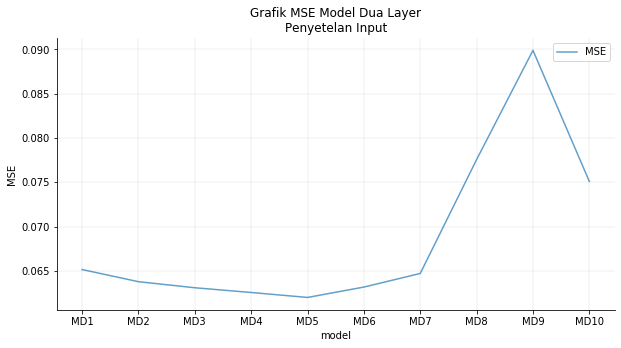

In [7]:
mses = [round(0.06515217205399976, 6),
        round(0.06378059019613068, 6),
        round(0.06309702061975057, 6),
        round(0.06256238277743086, 6),
        round(0.06200297321961066, 6), # BEST MD5
        round(0.06317436514649621, 6), 
        round(0.06470811524950877, 6),
        round(0.0775628935111518, 6), 
        round(0.0898838300313264, 6),
        round(0.07509178475862566, 6),
       ]
labels = ["MD1","MD2","MD3","MD4","MD5","MD6", "MD7", "MD8", "MD9", "MD10"]
graphicplotxy(labels, mses, "model", "MSE", "Grafik MSE Model Dua Layer\nPenyetelan Input", "MD_Train_Input.png")
mses

In [4]:
# MD11
MD11 = Sequential()
eksperimen("MD11", MD11, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 16, n_neuron_l2 = 8, n_epoch = 32)

# MD12
MD12 = Sequential()
eksperimen("MD12", MD12, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 64, n_neuron_l2 = 8, n_epoch = 32)

# MD13
MD13 = Sequential()
eksperimen("MD13", MD13, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 8, n_epoch = 32)

# MD14
MD14 = Sequential()
eksperimen("MD14", MD14, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 256, n_neuron_l2 = 8, n_epoch = 32)

# MD15
MD15 = Sequential()
eksperimen("MD15", MD15, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 512, n_neuron_l2 = 8, n_epoch = 32)

# MD16
MD16 = Sequential()
eksperimen("MD16", MD16, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 256, n_neuron_l2 = 4, n_epoch = 32)

# MD17
MD17 = Sequential()
eksperimen("MD17", MD17, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 256, n_neuron_l2 = 16, n_epoch = 32)

# MD18
MD18 = Sequential()
eksperimen("MD18", MD18, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 4, n_epoch = 32)

# MD19
MD19 = Sequential()
eksperimen("MD19", MD19, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 32)

# MD20
MD20 = Sequential()
eksperimen("MD20", MD20, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 64, n_neuron_l2 = 4, n_epoch = 32)

Hyperparameter MD11
input = 16
neuron l1 = 16
neuron l2 = 8
epoch = 32

Pelatihan MD11 Mulai
Pelatihan MD11 Selesai

Pengujian MD11
1073/1073 [==============================] - 0s 186us/step
MD11 MSE = 0.06206119479915302

-------------------------------------------------------------------------------------------

Hyperparameter MD12
input = 16
neuron l1 = 64
neuron l2 = 8
epoch = 32

Pelatihan MD12 Mulai
Pelatihan MD12 Selesai

Pengujian MD12
1073/1073 [==============================] - 0s 114us/step
MD12 MSE = 0.06186479524833403

-------------------------------------------------------------------------------------------

Hyperparameter MD13
input = 16
neuron l1 = 128
neuron l2 = 8
epoch = 32

Pelatihan MD13 Mulai
Pelatihan MD13 Selesai

Pengujian MD13
1073/1073 [==============================] - 0s 119us/step
MD13 MSE = 0.062405916234653684

-------------------------------------------------------------------------------------------

Hyperparameter MD14
input = 16
neuron l1 = 256
neu

[0.062061,
 0.062003,
 0.061865,
 0.062406,
 0.062015,
 0.062393,
 0.062088,
 0.062403,
 0.062239,
 0.061795,
 0.061932]

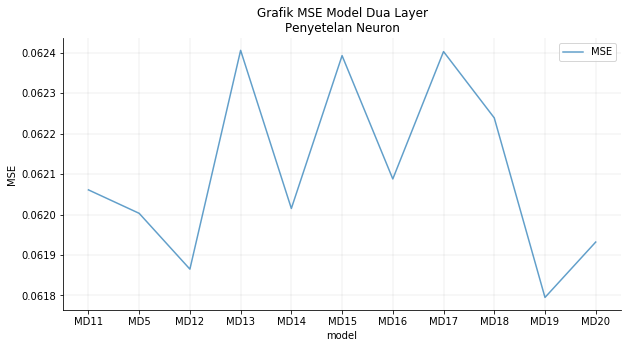

In [13]:
mses = [round(0.06206119479915302, 6), 
        round(0.06200297321961066, 6), #MD5
        round(0.06186479524833403, 6),
        round(0.062405916234653684, 6),
        round(0.06201541541145988, 6), 
        round(0.06239327543240669, 6),
        round(0.06208825752986222, 6), 
        round(0.06240271195727648, 6), 
        round(0.06223893794339612, 6), 
        round(0.06179516435794372, 6),#BEST MD19
        round(0.06193201667442571, 6),
       ]
labels = ["MD11","MD5","MD12","MD13","MD14","MD15", "MD16", "MD17", "MD18", "MD19", "MD20"]
graphicplotxy(labels, mses, "model", "MSE", "Grafik MSE Model Dua Layer\nPenyetelan Neuron", "MD_Train_Neuron.png")
mses

In [10]:
# MD21
MD21 = Sequential()
eksperimen("MD21", MD21, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 1)

# MD22
MD22 = Sequential()
eksperimen("MD22", MD22, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 2)

# MD23
MD23 = Sequential()
eksperimen("MD23", MD23, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 4)

# MD24
MD24 = Sequential()
eksperimen("MD24", MD24, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 8)

# MD25
MD25 = Sequential()
eksperimen("MD25", MD25, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 16)

# MD26
MD26 = Sequential()
eksperimen("MD26", MD26, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 64)

# MD27
MD27 = Sequential()
eksperimen("MD27", MD27, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 128)

# MD28
MD28 = Sequential()
eksperimen("MD28", MD28, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 256)

# MD29
MD29 = Sequential()
eksperimen("MD29", MD29, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 512)

# MD30
MD30 = Sequential()
eksperimen("MD30", MD30, scaler, set_latih, set_uji, n_input = 16, n_neuron_l1 = 128, n_neuron_l2 = 16, n_epoch = 1024)

Hyperparameter MD21
input = 16
neuron l1 = 128
neuron l2 = 16
epoch = 1

Pelatihan MD21 Mulai
Pelatihan MD21 Selesai

Pengujian MD21
1073/1073 [==============================] - 0s 118us/step
MD21 MSE = 0.06786580972602628

-------------------------------------------------------------------------------------------

Hyperparameter MD22
input = 16
neuron l1 = 128
neuron l2 = 16
epoch = 2

Pelatihan MD22 Mulai
Pelatihan MD22 Selesai

Pengujian MD22
1073/1073 [==============================] - 0s 183us/step
MD22 MSE = 0.06317410000425461

-------------------------------------------------------------------------------------------

Hyperparameter MD23
input = 16
neuron l1 = 128
neuron l2 = 16
epoch = 4

Pelatihan MD23 Mulai
Pelatihan MD23 Selesai

Pengujian MD23
1073/1073 [==============================] - 0s 122us/step
MD23 MSE = 0.0627464057264879

-------------------------------------------------------------------------------------------

Hyperparameter MD24
input = 16
neuron l1 = 128
neu

[0.067866,
 0.063174,
 0.062746,
 0.062384,
 0.062265,
 0.061795,
 0.06444,
 0.076577,
 0.103793,
 0.133457,
 0.168272]

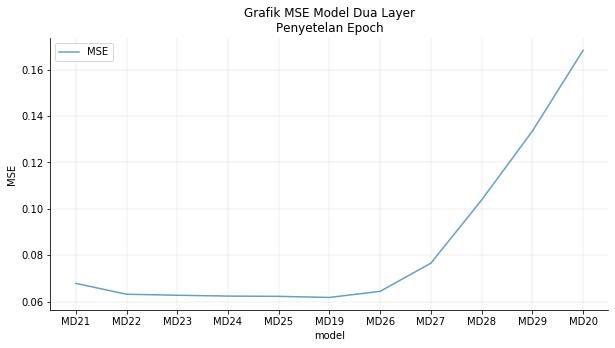

In [12]:
mses = [round(0.06786580972602628, 6),
        round(0.06317410000425461, 6),
        round(0.0627464057264879, 6),
        round(0.06238396739359782, 6), 
        round(0.06226545530618737, 6), 
        round(0.06179516435794372, 6), #MD19 #BEST
        round(0.06444015587226098, 6),
        round(0.07657707272876897, 6), 
        round(0.10379257644044942, 6), 
        round(0.1334573309330438, 6),
        round(0.16827215094601897, 6),
       ]
labels = ["MD21","MD22","MD23","MD24","MD25","MD19", "MD26", "MD27", "MD28", "MD29", "MD20"]
graphicplotxy(labels, mses, "model", "MSE", "Grafik MSE Model Dua Layer\nPenyetelan Epoch", "MD_Train_Epoch.png")
mses